In [1]:
println("test git PM")
println("test git LL")

test git PM
test git LL


In [2]:
# In this script I want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 08/17/21

# IMPORTANT NOTE: The equations were written and developed by Dr. Koan Briggs, this code was developed by LL + PM

#skip this cell if you've run it before
#import Pkg; Pkg.precompile()
#Pkg.add("Plots")
#using Pkg
#using Plots; gr()
#Pkg.add("DifferentialEquations")
#using DifferentialEquations

#println("Almost ready!")
#Pkg.update()
#ENV["GRDIR"]=""
#Pkg.build("GR")
#println("Ready bitch!")
#println("............")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


Almost ready!


    Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registries
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Types.jl:997
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
    Building GR → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/182da592436e287758ded5be6e32c406de3a2e47/build.log`


Ready bitch!
............


In [ ]:
# This cell solves the differential equations and plots a time course 
#------------------------------------
#--- Solve Differential Equations ---
#------------------------------------
using DifferentialEquations
function StackedRings_sd(paramvaluesList)
    x0Val, kOn, δ, Q = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^((-i+j-1)*ΔGp/(Rconst*T))
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8] -3*x[9] -2*x[10]-x[11]) + 2*keff(0,1)*x[2] +2*keff(1,0)*x[3] + keff(1,0)*x[4] + keff(0,1)*x[4] + 2*keff(1,0)*x[5] + keff(1,0)*x[6] + keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 4*keff(1,1)*x[8] + 3*keff(2,0)*x[9] + 2*keff(2,0)*x[10] + keff(0,1)*x[10] + 2*keff(2,1)*x[11] + keff(2,0)*x[11] + 2*keff(1,1)*x[11] + 6*keff(2,1)*x[12] - δ*x[1] + Q
        dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff(0,1)*x[2]+keff(1,0)*x[4]+keff(1,0)*x[6]+2*keff(2,0)*x[8]+keff(2,0)*x[10]+2*keff(3,0)*x[11] + 3*keff(4,0)*x[12] -δ*x[2]
        dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff(1,0)*x[3] + keff(0,1)*x[4]+2*keff(0,1)*x[5] + keff(0,1)*x[6]+2*keff(0,1)*x[7]+ 2*keff(0,2)*x[8] + 3*keff(2,0)*x[9]+keff(2,0)*x[10]+2*keff(2,1)*x[11] + keff(0,2)*x[11] + 6*keff(2,2)*x[12] - δ*x[3]
        dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff(1,0)*x[4] - keff(0,1)*x[4] + 2*keff(1,0)*x[5] +2*keff(1,1)*x[8]+ keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[4]
        dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff(1,0)*x[5] -keff(0,1)*x[5] + keff(2,1)*x[11] - δ*x[5]
        dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff(1,0)*x[6] - keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 2*keff(1,1)*x[8] + keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[6]
        dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff(1,0)*x[7] - keff(0,1)*x[7] + keff(2,1)*x[11] - δ*x[7]
        dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff(1,1)*x[8] - keff(2,0)*x[8] - keff(0,2)*x[8] + keff(2,0)*x[11] + 3*keff(4,0)*x[12] - δ*x[8]
        dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff(2,0)*x[9] + keff(0,1)*x[10] + keff(0,2)*x[11] + 2*keff(0,3)*x[12] - δ*x[9]
        dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff(2,0)*x[10] -keff(0,1)*x[10]+2*keff(1,1)*x[11] +6*keff(2,2)*x[12] - δ*x[10]
        dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff(2,1)*x[11] -keff(2,0)*x[11] -2*keff(1,1)*x[11] -2*keff(3,0)*x[11] -keff(0,2)*x[11] +6*keff(2,1)*x[12] - δ*x[11]
        dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff(2,1)*x[12] -3*keff(4,0)*x[12]-6*keff(2,2)*x[12] -6*keff(4,1)*x[12] -keff(0,3)*x[12] -δ*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    # --- parameter values ---
    # print parameter values 
    #println("kOn: ", kOn)
    #println("kd1: ", kd1)
    #println("kd2:", kd2)
    #println("delta: ", δ)
    #println("q: ", Q)
    #println("c0:", c0)


    # --- time span --- 
    tspan = (0.000001, 10.0^9)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_sd(paramvaluesList)")

#-----------------------
# --- Assembly Yeild ---
#-----------------------
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end

println("get AY w/ last time point: assemblyYield(solRaw)")

#-----------------------------
# --- plot the time course ---
#-----------------------------
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

println("to get time course: plotTimeCourse(sol, AY)")

#-----------------------
# --- AY time course ---
#-----------------------

function AYtimeCourse(solRaw)
    #This function will return the Assembly yield for every time point in a time course for the last species x12
    # --- empty list/initialization --- #
    list_AY=[]
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts); # print("total time points: ", totPts)
    allSols = solRaw.u; #print(allSols)
    for tp_i = 1:totPts
        #println("item in loop: ")
        # print("time: ", tp_i, "\n")
        #print(tp_i)
        # slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
        slntEnd_pre = allSols[tp_i,:]; slntEnd = slntEnd_pre[1]
        # --- calculate Xn = X12 ---
        nSpec = length(slntEnd); 
        Xn = slntEnd[nSpec]
        # --- calculate XT --- 
        cnt = 1; XT = 0
        for it in slntEnd
            addIt = cnt*it
            XT += addIt
            cnt += 1
        end
        # --- calculate Yn ---
        Yn = n*Xn/XT; # add this to the AY list
        # print("AY at ti= ", Yn)
        push!(list_AY, Yn)
    end 
    # print("all tps: ", timePts)
    return list_AY, timePts   
end

println("AY Time course: AYtimecourse(solRaw)")

#----------------------------
# --- plot AY time course ---
#----------------------------
function plotAYtimeCourse(list_AY, timePts)
    # print("total pts: ", length(timePts), "\n")
    #print("--")
    # this function will plot the AY time course give the AY list and the time points 
    p2=plot(timePts,list_AY,linewidth=2,title="Stacked rings Assembly Yield + NO synth/deg",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p2)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0816_AY_001.png")
    println("Figure saved")
    
end 

println("to plot time course: plotAYtimeCourse(list_AY, timePts)")

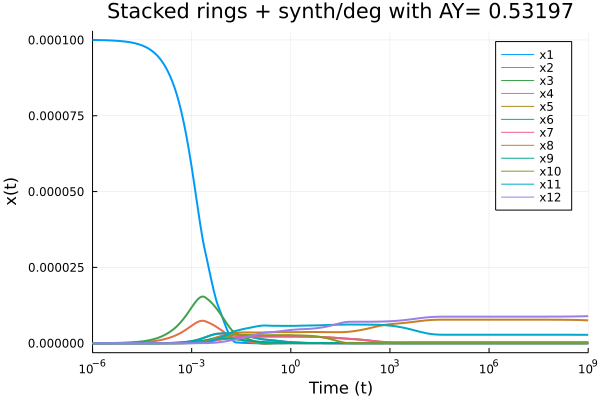

[1.0849960081450265e-17, 3.7964188795228913e-20, 5.350941353530002e-8, 1.25547931462947e-15, 2.8632573002310125e-7, 1.25547931462947e-15, 2.8632573002310125e-7, 7.527330049483291e-6, 6.565193296254501e-9, 2.3394491091672876e-16, 2.770637171819608e-6, 8.936695614875457e-6]Plot done!
Saving file...
Figure saved


In [23]:
# This cell solves for assembly yield at one time point, plots time course with AY in title 




# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

# Now to calculate the Assembly Yield - AY
# I want to determine the AY at 24hrs for x12 

# Yn = n*Xn/XT
x0Val=10^-4
kOn = 10^6
δ = 0
Q = 0
paramvaluesList = x0Val, kOn, δ, Q

sol1 = StackedRings_sd(paramvaluesList)
# print(sol1)
#plotTimeCourse(sol1)
AY = assemblyYield(sol1);
plotTimeCourse(sol1,AY)

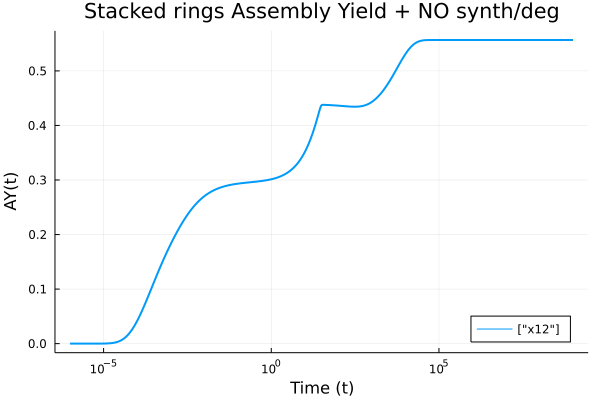

Plot done!
Saving file...
Figure saved


In [39]:
# Function to get AY curve 
# 08/18/21 


    
    


c0=1
kd1 = 10^-8 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
#--- initial condition ---
#tic() # check time elapsed
x0Val=10^-2; kOn = 10^6
paramvaluesList= x0Val, kOn, δ, Q
sol = StackedRings_sd(paramvaluesList)

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
plotAYtimeCourse(list_AY, timePts)
#toc()


In [17]:
# IC vs Ay 
# Let's calculate the AY for X12 at the last time point for increasing values of Initial conditions (ICs)

# fixed parameters
c0=1
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 


allICs = [10^-8, 10^-3]

# initialize lists to store
AY_list = []
# function to calculate AY for a whole time course - AY at each time point but only for the x12 species 
for icVal in allICs
    # loop through all the IC values
    #x0Val=10^-4; 
    x0Val=icVal; #print(x0Val)
    # solve the system
    paramvaluesList= x0Val, kOn, δ, Q
    sol = StackedRings_sd(paramvaluesList);
    # calculate AY 
    ayVali = assemblyYield(sol); #print(ayVali)
    # store value of AY 
    push!(AY_list, ayVali)
end 

print(AY_list)


Any[0.9196228703740672, 0.5663392963439791]

In [ ]:
#to do:
#run the function with out delta or q, compare the graph results
#play around with parameters to make the x12 bigger than zero make sure that assembly yeild
#Keff arbirtary eperare ODE function that will allow us to change each of the keffs
    #could list through blund force, or make a vector

In [12]:
# IC parameter sweep
function ICvAY(minIC, maxIC,stepsizeIC)
    # --- constants ---
    i=1;j=1; # indicies that will change later 
    c0 =1
    α = c0^(-i-j+1); # print("alpha: " , α)
    kOn = 10^-6 # M^-1 s^-1
    kd1 = 1
    kd2 = 1
    ΔGp = -10
    Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
    T = 298 # in Kelvin (K)

    #Q = 1 # synthesis parameter
    Q = 0 #0.5*10^-5
    δ = 0 #10^-5
    xT = 0 #10.0 
    #δ = xT/Q # degradation
    eConst = ℯ^( -(i+j -1) * ΔGp/(Rconst*T) )
    keff = α*kOn*kd1*kd2*eConst
    keff = 10^-6
    for IC in range(minIC, maxIC, step= stepsizeIC)
        # --- empty lists --- #
        list_AY=[]
        list_IC=[]
        # --- initial conditions --- 
        x0=[IC; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
        # --- parameter values ---
        p = (kOn, keff, δ, Q) # fixed parameters-- δ & Q always equal zero
        p = 
        # --- time span --- 
        tspan = (0.000001, 10.0^6)
        # --- ode solver --- 
        prob = ODEProblem(twoStackedRingsSystem!,x0,tspan,p)
        sol = solve(prob);
        AY=assemblyYield(sol)
        push!(list_AY, AY)
        push!(list_IC, IC)
    end
        return(list_IC, list_AY)
end

test1=ICvAY(0,10, 1)
println(test results:)
println(---------------------)
println(test1)
println(---------------------)
#Plotting IC v AY
using Plots; gr()
p3=plot((test1[1], test1[2]),linewidth=2,title="2 stacked rings NO synth/deg-- IC v AY",xaxis = ("Time (t)"),
     yaxis="x(t)") # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p3)

LoadError: UndefVarError: twoStackedRingsSystem! not defined

In [ ]:

# --- parameter values here ---
c0=1
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-4; kOn = 10^6
paramvaluesList= x0Val, kOn, δ, Q
sol = StackedRings_sd(paramvaluesList)
using Plots; gr()
p1=plot(sol,linewidth=2,title="2 stacked rings + synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
println("Saving file...")
#savefig("C:\\plot_2SR_0715_003.png")
println("Figure saved")